# Compte-rendu TP IMA203 Méthodes variationnelles

In [8]:
import numpy as np
import platform
import tempfile

import matplotlib.pyplot as plt
from scipy import ndimage as ndi
# necessite scikit-image
from skimage import io as skio

from helpers import *

# POUR LA MORPHO
from skimage.morphology import watershed
from skimage.feature import peak_local_max
import os
os.chdir(r'C:\Users\theor\OneDrive\Documents\Travaux\Télécom ParisTech ~ 2A\IMA\IMA203\TP méthodes variationnelles\donnees_IMA203\donnees_IMA203')


ModuleNotFoundError: No module named 'helpers'

## 1 - Débruitage par régularisation quadratique

### Question 1

On dispose d'un **modèle d'observation de type $v = u + b$** où $v$ est **l'image observée**, $u$ est **l'image parfaite** et $b$ est un **bruit**. On cherche à minimiser l'énergie $$E_1(u) = \|u-v\|^2 + \lambda \|\nabla{u}\|^2 = \|u-v\|^2 + \lambda \int \int \|\nabla{u}(x,y)\|^2 dx dy$$

A l'aide du script python fourni, on dispose d'une fonction ``resoud_quad_fourier`` et d'une fonction ``minimisation_quadratique``. Ces fonctions exploitent la minimisation quadratique telle que décrite dans le poly (page 52) : on réécrit la formule ci-dessus en discret : 

$$ E_1(u) = \|\Delta*u-v\|^2 + \lambda(\|D_xu\|^2 + \|D_yu\|^2) $$ 

avec $D_x$ et $D_y$ les matrices de dérivation en x et y et $\Delta$ la matrice avec des 0 partout sauf dans la première case en (0,0) où elle vaut 1.

L'égalité de Parseval nous autorise à passer en Fourier (l'énergie est la même) : 

$$ E_1(u) = \sum_{\omega} \left[ \|\hat{k}\hat{u}-\hat{v}\|^2 + \lambda(\|D_xu\|^2 + \|D_yu\|^2) \right]$$

**Ainsi, les fonctions ``resoud_quad_fourier`` et ``minimisation_quadratique`` permettent de retrouver la transformée de Fourier de l'image parfaite en s'appuyant sur la formule** : 

$$ \hat{u}(\omega) = \frac{\overline{\hat{k}(\omega)}}{|\hat{k}(\omega)|^2+\lambda(|\hat{k}_x(\omega)|^2 + |\hat{k}_y(\omega)|^2)}\hat{v}(\omega) $$

**et donc d'en déduire l'image parfaite $u$**.

### Question 2

Lorsque $\lambda$ est petit, le débruitage donne une image grainée (on a sous-estimé le terme de régularisation, i.e. le bruit). 

Ici, pour $\lambda = 0.1$ : 
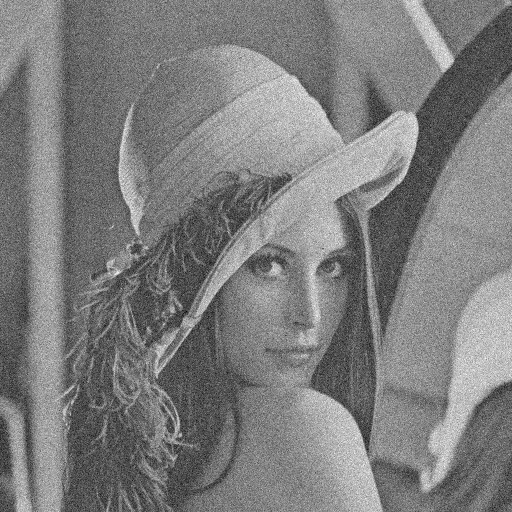

Lorsque $\lambda$ est grand, le débruitage donne une image floue (on a sur-estimé le terme de régularisation, i.e. le bruit). 

Ici, pour $\lambda = 100$ :
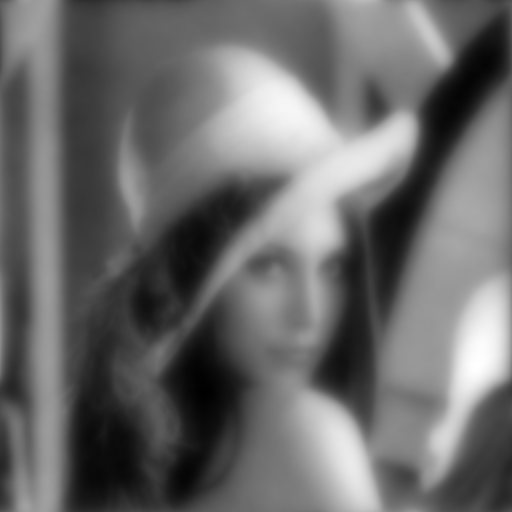

### Question 3

On a une image parfaite de Lena, appelée $u$. On la bruite avec un écart-type $\sigma = 5$ de façon à obtenir une image dégradée $v$, et on appelle $\tilde{u}$ l'image restaurée par minimisation quadratique à partir de $v$. 

Le but est de trouver un $\lambda$ (en argument de la fonction ``minimisation_quadratique``) tel que l'image reconstruite $\tilde{u}$ soit à la même distance 

In [6]:
myim=np.float32(skio.imread('lena.tif'))

a = 0.01
b = 10
c = (a+b)/2

u = myim
v = imb

dist_obj = norm2(u-v)**2
dist = norm2(minimisation_quadratique(v, c)-v)**2
eps = 0.0001

while(abs(dist-dist_obj)>eps):
    if dist < dist_obj:
        a = c
    else:
        b = c
    c = (a+b)/2
    dist = norm2(minimisation_quadratique(v, c)-v)**2

NameError: name 'imb' is not defined

### Question 4

## 2 - Débruitage par variation totale

### 2.1 - Descente de gradient

Pour $\lambda = 10$, on teste le programme ``minimise_TV_gradient`` pour différentes valeurs de pas de descente. En effectuant **100 itérations**, pour tous les pas testés strictement inférieurs à 1, on obtient la **même valeur d'énergie minimale** ($1,78.10^8$ dans notre exemple). La valeur de l'énergie obtenue est très grande en ordre de grandeur, et le programme est lent à s'exécuter. 

Pour obtenir un meilleur résultat avec cette méthode, on aurait besoin de davantage d'itérations mais cela est **infaisable en pratique car trop long à exécuter**. Dans les faits, on ne peut donc pas avoir accès au minimum d'énergie par cette méthode car elle prend trop de temps de calcul.

### 2.2 - Projection Chambolle

L'algorithme est beaucoup plus rapide et donne une valeur minimale d'énergie bien meilleure que la méthode de descente de gradient en pratique (on obtient un minimum d'énergie de $8929$ pour les mêmes paramètres que la question précédente). 

## 3 - Comparaison

On cherche à comparer la méthode de régularisation par régularisation quadratique et par variation totale. On utilise la dernière partie du script.
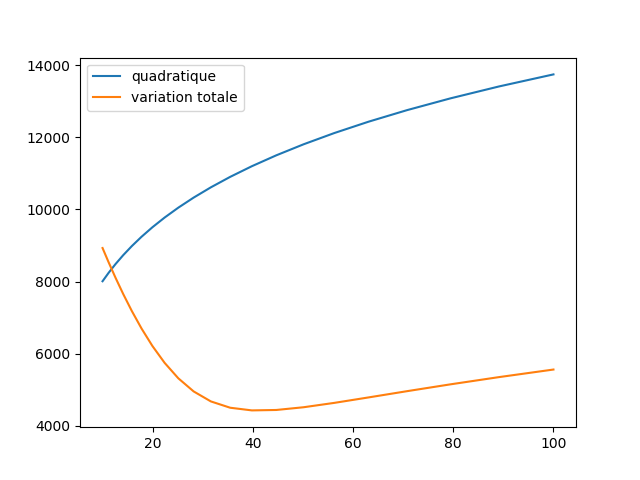

On observe une meilleure minimisation de l'énergie pour la méthode de variation totale.